# Extracción de Datos de CO2 y Temperatura

In [1]:
# Importamos las bibliotecas que vamos a usar
#%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid
import os

In [2]:
# Definimos los arrays principales que vamos a usar
tiempos = np.array([])
co2 = np.array([])    # (ppm)

estado_valvula_co2_1 =  np.array([])
estado_valvula_compost_1 = np.array([])
estado_valvula_co2_2 =  np.array([])
estado_valvula_compost_2 = np.array([])
temp_suncho = np.array([])
estado_valvula_co2_3 =  np.array([])
estado_valvula_compost_3 = np.array([])
temp_suncho = np.array([])
estado_valvula_co2_4 =  np.array([])
estado_valvula_compost_4 = np.array([])
temp_suncho = np.array([])

temp_suncho = np.array([])

temp_compost_1 = np.array([])
temp_compost_2 = np.array([])
temp_compost_3 = np.array([])
temp_compost_4 = np.array([])

estado_suncho = np.array([])    # Apagado: 0, Prendido: 1

In [3]:
# Definamos la carpeta con las mediciones como PATH
PATH = f"./measurements/full-x4"

DATE= f'2022-04-07_20-17-51'

# Creamos una carpeta para las figuras (si es que no existe)
if not os.path.isdir(f"{PATH}/{DATE}/figuras"):
    os.makedirs(f"{PATH}/{DATE}/figuras")

In [4]:
# Veamos el primer archivo csv como ejemplo
df0 = pd.read_csv(f"{PATH}/{DATE}/data_0.csv")
display(df0)

,Date_Time,CO2,Estado_Valvula_CO2_1,Estado_Valvula_Compost_1,Estado_Valvula_CO2_2,Estado_Valvula_Compost_2,Estado_Valvula_CO2_3,Estado_Valvula_Compost_3,Estado_Valvula_CO2_4,Estado_Valvula_Compost_4,Temp_Compost_1,Temp_Compost_2,Temp_Compost_3,Temp_Compost_4,Temp_Suncho,Estado_Suncho
0,07/04/2022_20:17:54,500,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,47.25,49.06,61.25,54.94,50.13,Prendido
1,07/04/2022_20:18:00,500,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,47.25,49.06,61.25,55.00,50.06,Prendido
2,07/04/2022_20:18:06,500,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,47.19,49.06,61.25,54.94,50.13,Prendido
3,07/04/2022_20:18:11,499,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,47.19,49.06,61.19,55.00,50.06,Prendido
4,07/04/2022_20:18:17,499,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,47.19,49.00,61.25,54.94,50.06,Prendido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,07/04/2022_20:27:05,507,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,44.56,44.31,36.81,46.19,35.50,Prendido
95,07/04/2022_20:27:11,507,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,44.31,44.00,37.19,46.19,35.38,Prendido
96,07/04/2022_20:27:17,507,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,44.00,43.81,37.31,46.25,35.44,Prendido
97,07/04/2022_20:27:23,507,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,43.81,43.56,36.69,46.25,35.38,Prendido


In [5]:
# Antes de llenar los arrays vamos a necesitar una función que convierta un tiempo en el formato que usamos en tiempo absoluto para poder comparar las mediciones entre sí
def convertirTiempo(t_i, t):
    print(t)
    dia = int(t[:2])
    mes = int(t[3:5])
    ano = int(t[6:10])
    hora = int(t[11:13])
    minuto = int(t[14:16])
    segundo = int(t[17:])
    
    t_abs = segundo + 60 * minuto + (60 ** 2) * hora + 24 * (60 ** 2) * dia + 30 * 24 * (60 ** 2) * mes + 12 * 30 * 24 * (60 ** 2) * ano
    return t_abs - t_i


# Definamos el tiempo inicial
datetime0 = np.transpose(df0["Date_Time"].to_numpy())[0]
t_i = convertirTiempo(0, datetime0)

07/04/2022_20:17:54


In [6]:
# Contemos la cantidad de csv's  que llenamos
n = 0
for file in os.listdir(f'{PATH}/{DATE}'):
    if file.endswith(".csv"):
        n += 1

print(n)

51


In [7]:
# Llenemos las listas con los datos
for i in range(n):
    i=i
    df = pd.read_csv(f"{PATH}/{DATE}/data_{i}.csv")

    # CO2
    
    # Con este loop cambiamos cualquier tipo de error en la medicion de co2 a -1
    co2_column = df["CO2"].to_numpy()
    for i in range(len(co2_column)):
        # Chequeamos que la celda sea un str y que sea mas larga que 4, ya que el sensor solo mide hasta 5000
        if type(co2_column[i]) is str and len(co2_column[i]) > 4:
            co2_column[i] = -1

    co2 = np.concatenate((co2, np.transpose(co2_column)))

    # Tiempo
    for t in np.transpose(df["Date_Time"].to_numpy()):
        tiempos = np.concatenate((tiempos, np.array([convertirTiempo(t_i, t)])))
        
    # Temperaturas
    temp_suncho = np.concatenate((temp_suncho, np.transpose(df["Temp_Suncho"].to_numpy())))
    temp_compost_1 = np.concatenate((temp_compost_1, np.transpose(df["Temp_Compost_1"].to_numpy())))
    temp_compost_2 = np.concatenate((temp_compost_2, np.transpose(df["Temp_Compost_2"].to_numpy())))
    temp_compost_3 = np.concatenate((temp_compost_3, np.transpose(df["Temp_Compost_3"].to_numpy())))
    temp_compost_4 = np.concatenate((temp_compost_4, np.transpose(df["Temp_Compost_4"].to_numpy())))
    
    # Estados
    for e in np.transpose(df["Estado_Valvula_CO2_1"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_1 = np.concatenate((estado_valvula_co2_1, np.array([1])))
        else:
            estado_valvula_co2_1 = np.concatenate((estado_valvula_co2_1, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_1"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_1 = np.concatenate((estado_valvula_compost_1, np.array([1])))
        else:
            estado_valvula_compost_1 = np.concatenate((estado_valvula_compost_1, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_CO2_2"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_2 = np.concatenate((estado_valvula_co2_2, np.array([1])))
        else:
            estado_valvula_co2_2 = np.concatenate((estado_valvula_co2_2, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_2"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_2 = np.concatenate((estado_valvula_compost_2, np.array([1])))
        else:
            estado_valvula_compost_2 = np.concatenate((estado_valvula_compost_2, np.array([0])))

    for e in np.transpose(df["Estado_Valvula_CO2_3"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_3 = np.concatenate((estado_valvula_co2_3, np.array([1])))
        else:
            estado_valvula_co2_3 = np.concatenate((estado_valvula_co2_3, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_3"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_3 = np.concatenate((estado_valvula_compost_3, np.array([1])))
        else:
            estado_valvula_compost_3 = np.concatenate((estado_valvula_compost_3, np.array([0])))
       
    for e in np.transpose(df["Estado_Valvula_CO2_4"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_4 = np.concatenate((estado_valvula_co2_4, np.array([1])))
        else:
            estado_valvula_co2_4 = np.concatenate((estado_valvula_co2_4, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_4"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_4 = np.concatenate((estado_valvula_compost_4, np.array([1])))
        else:
            estado_valvula_compost_4 = np.concatenate((estado_valvula_compost_4, np.array([0])))   
    
    
    for e in np.transpose(df["Estado_Suncho"].to_numpy()):
        if e == "Prendido":
            estado_suncho = np.concatenate((estado_suncho, np.array([1])))
        else:
            estado_suncho = np.concatenate((estado_suncho, np.array([0])))

07/04/2022_20:17:54
07/04/2022_20:18:00
07/04/2022_20:18:06
07/04/2022_20:18:11
07/04/2022_20:18:17
07/04/2022_20:18:23
07/04/2022_20:18:29
07/04/2022_20:18:35
07/04/2022_20:18:41
07/04/2022_20:18:47
07/04/2022_20:18:52
07/04/2022_20:18:58
07/04/2022_20:19:04
07/04/2022_20:19:10
07/04/2022_20:19:16
07/04/2022_20:19:22
07/04/2022_20:19:28
07/04/2022_20:19:34
07/04/2022_20:19:39
07/04/2022_20:19:45
07/04/2022_20:19:51
07/04/2022_20:19:57
07/04/2022_20:20:03
07/04/2022_20:20:09
07/04/2022_20:20:15
07/04/2022_20:20:20
07/04/2022_20:20:26
07/04/2022_20:20:32
07/04/2022_20:20:38
07/04/2022_20:20:44
07/04/2022_20:20:50
07/04/2022_20:20:56
07/04/2022_20:21:02
07/04/2022_20:21:07
07/04/2022_20:21:13
07/04/2022_20:21:19
07/04/2022_20:21:25
07/04/2022_20:21:31
07/04/2022_20:21:37
07/04/2022_20:21:43
07/04/2022_20:21:48
07/04/2022_20:21:54
07/04/2022_20:22:00
07/04/2022_20:22:06
07/04/2022_20:22:12
07/04/2022_20:22:18
07/04/2022_20:22:24
07/04/2022_20:22:29
07/04/2022_20:22:35
07/04/2022_20:22:41


07/04/2022_21:16:27
07/04/2022_21:16:33
07/04/2022_21:16:39
07/04/2022_21:16:45
07/04/2022_21:16:51
07/04/2022_21:16:57
07/04/2022_21:17:02
07/04/2022_21:17:08
07/04/2022_21:17:14
07/04/2022_21:17:20
07/04/2022_21:17:26
07/04/2022_21:17:32
07/04/2022_21:17:38
07/04/2022_21:17:44
07/04/2022_21:17:49
07/04/2022_21:17:55
07/04/2022_21:18:01
07/04/2022_21:18:07
07/04/2022_21:18:13
07/04/2022_21:18:19
07/04/2022_21:18:25
07/04/2022_21:18:30
07/04/2022_21:18:36
07/04/2022_21:18:42
07/04/2022_21:18:48
07/04/2022_21:18:54
07/04/2022_21:19:00
07/04/2022_21:19:06
07/04/2022_21:19:12
07/04/2022_21:19:17
07/04/2022_21:19:23
07/04/2022_21:19:29
07/04/2022_21:19:35
07/04/2022_21:19:41
07/04/2022_21:19:47
07/04/2022_21:19:53
07/04/2022_21:19:58
07/04/2022_21:20:04
07/04/2022_21:20:10
07/04/2022_21:20:16
07/04/2022_21:20:22
07/04/2022_21:20:28
07/04/2022_21:20:34
07/04/2022_21:20:40
07/04/2022_21:20:45
07/04/2022_21:20:51
07/04/2022_21:20:57
07/04/2022_21:21:03
07/04/2022_21:21:09
07/04/2022_21:21:15


07/04/2022_22:05:21
07/04/2022_22:05:27
07/04/2022_22:05:32
07/04/2022_22:05:38
07/04/2022_22:05:44
07/04/2022_22:05:50
07/04/2022_22:05:56
07/04/2022_22:06:02
07/04/2022_22:06:08
07/04/2022_22:06:13
07/04/2022_22:06:19
07/04/2022_22:06:25
07/04/2022_22:06:31
07/04/2022_22:06:37
07/04/2022_22:06:43
07/04/2022_22:06:49
07/04/2022_22:06:54
07/04/2022_22:07:00
07/04/2022_22:07:06
07/04/2022_22:07:12
07/04/2022_22:07:18
07/04/2022_22:07:24
07/04/2022_22:07:30
07/04/2022_22:07:36
07/04/2022_22:07:41
07/04/2022_22:07:47
07/04/2022_22:07:53
07/04/2022_22:07:59
07/04/2022_22:08:05
07/04/2022_22:08:11
07/04/2022_22:08:17
07/04/2022_22:08:22
07/04/2022_22:08:28
07/04/2022_22:08:34
07/04/2022_22:08:40
07/04/2022_22:08:46
07/04/2022_22:08:52
07/04/2022_22:08:58
07/04/2022_22:09:04
07/04/2022_22:09:09
07/04/2022_22:09:15
07/04/2022_22:09:21
07/04/2022_22:09:27
07/04/2022_22:09:33
07/04/2022_22:09:39
07/04/2022_22:09:45
07/04/2022_22:09:51
07/04/2022_22:09:56
07/04/2022_22:10:02
07/04/2022_22:10:08


07/04/2022_22:48:10
07/04/2022_22:48:16
07/04/2022_22:48:22
07/04/2022_22:48:28
07/04/2022_22:48:34
07/04/2022_22:48:40
07/04/2022_22:48:46
07/04/2022_22:48:51
07/04/2022_22:48:57
07/04/2022_22:49:03
07/04/2022_22:49:09
07/04/2022_22:49:15
07/04/2022_22:49:21
07/04/2022_22:49:27
07/04/2022_22:49:33
07/04/2022_22:49:38
07/04/2022_22:49:44
07/04/2022_22:49:50
07/04/2022_22:49:56
07/04/2022_22:50:02
07/04/2022_22:50:08
07/04/2022_22:50:14
07/04/2022_22:50:19
07/04/2022_22:50:25
07/04/2022_22:50:31
07/04/2022_22:50:37
07/04/2022_22:50:43
07/04/2022_22:50:49
07/04/2022_22:50:55
07/04/2022_22:51:01
07/04/2022_22:51:06
07/04/2022_22:51:12
07/04/2022_22:51:18
07/04/2022_22:51:24
07/04/2022_22:51:30
07/04/2022_22:51:36
07/04/2022_22:51:42
07/04/2022_22:51:47
07/04/2022_22:51:53
07/04/2022_22:51:59
07/04/2022_22:52:05
07/04/2022_22:52:11
07/04/2022_22:52:17
07/04/2022_22:52:23
07/04/2022_22:52:29
07/04/2022_22:52:34
07/04/2022_22:52:40
07/04/2022_22:52:46
07/04/2022_22:52:52
07/04/2022_22:52:58


07/04/2022_23:33:20
07/04/2022_23:33:26
07/04/2022_23:33:32
07/04/2022_23:33:38
07/04/2022_23:33:44
07/04/2022_23:33:50
07/04/2022_23:33:56
07/04/2022_23:34:01
07/04/2022_23:34:07
07/04/2022_23:34:13
07/04/2022_23:34:19
07/04/2022_23:34:25
07/04/2022_23:34:31
07/04/2022_23:34:37
07/04/2022_23:34:42
07/04/2022_23:34:48
07/04/2022_23:34:54
07/04/2022_23:35:00
07/04/2022_23:35:06
07/04/2022_23:35:12
07/04/2022_23:35:18
07/04/2022_23:35:24
07/04/2022_23:35:29
07/04/2022_23:35:35
07/04/2022_23:35:41
07/04/2022_23:35:47
07/04/2022_23:35:53
07/04/2022_23:35:59
07/04/2022_23:36:05
07/04/2022_23:36:10
07/04/2022_23:36:16
07/04/2022_23:36:22
07/04/2022_23:36:28
07/04/2022_23:36:34
07/04/2022_23:36:40
07/04/2022_23:36:46
07/04/2022_23:36:52
07/04/2022_23:36:57
07/04/2022_23:37:03
07/04/2022_23:37:09
07/04/2022_23:37:15
07/04/2022_23:37:21
07/04/2022_23:37:27
07/04/2022_23:37:33
07/04/2022_23:37:38
07/04/2022_23:37:44
07/04/2022_23:37:50
07/04/2022_23:37:56
07/04/2022_23:38:02
07/04/2022_23:38:08


08/04/2022_00:32:00
08/04/2022_00:32:06
08/04/2022_00:32:12
08/04/2022_00:32:18
08/04/2022_00:32:24
08/04/2022_00:32:30
08/04/2022_00:32:35
08/04/2022_00:32:41
08/04/2022_00:32:47
08/04/2022_00:32:53
08/04/2022_00:32:59
08/04/2022_00:33:05
08/04/2022_00:33:11
08/04/2022_00:33:16
08/04/2022_00:33:22
08/04/2022_00:33:28
08/04/2022_00:33:34
08/04/2022_00:33:40
08/04/2022_00:33:46
08/04/2022_00:33:52
08/04/2022_00:33:58
08/04/2022_00:34:03
08/04/2022_00:34:09
08/04/2022_00:34:15
08/04/2022_00:34:21
08/04/2022_00:34:27
08/04/2022_00:34:33
08/04/2022_00:34:39
08/04/2022_00:34:44
08/04/2022_00:34:50
08/04/2022_00:34:56
08/04/2022_00:35:02
08/04/2022_00:35:08
08/04/2022_00:35:14
08/04/2022_00:35:20
08/04/2022_00:35:25
08/04/2022_00:35:31
08/04/2022_00:35:37
08/04/2022_00:35:43
08/04/2022_00:35:49
08/04/2022_00:35:55
08/04/2022_00:36:01
08/04/2022_00:36:07
08/04/2022_00:36:12
08/04/2022_00:36:18
08/04/2022_00:36:24
08/04/2022_00:36:30
08/04/2022_00:36:36
08/04/2022_00:36:42
08/04/2022_00:36:48


08/04/2022_01:34:41
08/04/2022_01:34:46
08/04/2022_01:34:52
08/04/2022_01:34:58
08/04/2022_01:35:04
08/04/2022_01:35:10
08/04/2022_01:35:16
08/04/2022_01:35:22
08/04/2022_01:35:27
08/04/2022_01:35:33
08/04/2022_01:35:39
08/04/2022_01:35:45
08/04/2022_01:35:51
08/04/2022_01:35:57
08/04/2022_01:36:03
08/04/2022_01:36:09
08/04/2022_01:36:14
08/04/2022_01:36:20
08/04/2022_01:36:26
08/04/2022_01:36:32
08/04/2022_01:36:38
08/04/2022_01:36:44
08/04/2022_01:36:50
08/04/2022_01:36:55
08/04/2022_01:37:01
08/04/2022_01:37:07
08/04/2022_01:37:13
08/04/2022_01:37:19
08/04/2022_01:37:25
08/04/2022_01:37:31
08/04/2022_01:37:37
08/04/2022_01:37:42
08/04/2022_01:37:48
08/04/2022_01:37:54
08/04/2022_01:38:00
08/04/2022_01:38:06
08/04/2022_01:38:12
08/04/2022_01:38:18
08/04/2022_01:38:23
08/04/2022_01:38:29
08/04/2022_01:38:35
08/04/2022_01:38:41
08/04/2022_01:38:47
08/04/2022_01:38:53
08/04/2022_01:38:59
08/04/2022_01:39:05
08/04/2022_01:39:10
08/04/2022_01:39:16
08/04/2022_01:39:22
08/04/2022_01:39:28


08/04/2022_02:19:33
08/04/2022_02:19:39
08/04/2022_02:19:44
08/04/2022_02:19:50
08/04/2022_02:19:56
08/04/2022_02:20:02
08/04/2022_02:20:08
08/04/2022_02:20:14
08/04/2022_02:20:20
08/04/2022_02:20:25
08/04/2022_02:20:31
08/04/2022_02:20:37
08/04/2022_02:20:43
08/04/2022_02:20:49
08/04/2022_02:20:55
08/04/2022_02:21:01
08/04/2022_02:21:07
08/04/2022_02:21:12
08/04/2022_02:21:18
08/04/2022_02:21:24
08/04/2022_02:21:30
08/04/2022_02:21:36
08/04/2022_02:21:42
08/04/2022_02:21:48
08/04/2022_02:21:53
08/04/2022_02:21:59
08/04/2022_02:22:05
08/04/2022_02:22:11
08/04/2022_02:22:17
08/04/2022_02:22:23
08/04/2022_02:22:29
08/04/2022_02:22:35
08/04/2022_02:22:40
08/04/2022_02:22:46
08/04/2022_02:22:52
08/04/2022_02:22:58
08/04/2022_02:23:04
08/04/2022_02:23:10
08/04/2022_02:23:16
08/04/2022_02:23:21
08/04/2022_02:23:27
08/04/2022_02:23:33
08/04/2022_02:23:39
08/04/2022_02:23:45
08/04/2022_02:23:51
08/04/2022_02:23:57
08/04/2022_02:24:03
08/04/2022_02:24:08
08/04/2022_02:24:14
08/04/2022_02:24:20


08/04/2022_03:04:08
08/04/2022_03:04:13
08/04/2022_03:04:19
08/04/2022_03:04:25
08/04/2022_03:04:31
08/04/2022_03:04:37
08/04/2022_03:04:43
08/04/2022_03:04:49
08/04/2022_03:04:55
08/04/2022_03:05:00
08/04/2022_03:05:06
08/04/2022_03:05:12
08/04/2022_03:05:18
08/04/2022_03:05:24
08/04/2022_03:05:30
08/04/2022_03:05:36
08/04/2022_03:05:41
08/04/2022_03:05:47
08/04/2022_03:05:53
08/04/2022_03:05:59
08/04/2022_03:06:05
08/04/2022_03:06:11
08/04/2022_03:06:17
08/04/2022_03:06:23
08/04/2022_03:06:28
08/04/2022_03:06:34
08/04/2022_03:06:40
08/04/2022_03:06:46
08/04/2022_03:06:52
08/04/2022_03:06:58
08/04/2022_03:07:04
08/04/2022_03:07:09
08/04/2022_03:07:15
08/04/2022_03:07:21
08/04/2022_03:07:27
08/04/2022_03:07:33
08/04/2022_03:07:39
08/04/2022_03:07:45
08/04/2022_03:07:51
08/04/2022_03:07:56
08/04/2022_03:08:02
08/04/2022_03:08:08
08/04/2022_03:08:14
08/04/2022_03:08:20
08/04/2022_03:08:26
08/04/2022_03:08:32
08/04/2022_03:08:37
08/04/2022_03:08:43
08/04/2022_03:08:49
08/04/2022_03:08:55


08/04/2022_03:58:12
08/04/2022_03:58:17
08/04/2022_03:58:23
08/04/2022_03:58:29
08/04/2022_03:58:35
08/04/2022_03:58:41
08/04/2022_03:58:47
08/04/2022_03:58:53
08/04/2022_03:58:59
08/04/2022_03:59:04
08/04/2022_03:59:10
08/04/2022_03:59:16
08/04/2022_03:59:22
08/04/2022_03:59:28
08/04/2022_03:59:34
08/04/2022_03:59:40
08/04/2022_03:59:45
08/04/2022_03:59:51
08/04/2022_03:59:57
08/04/2022_04:00:03
08/04/2022_04:00:09
08/04/2022_04:00:15
08/04/2022_04:00:21
08/04/2022_04:00:27
08/04/2022_04:00:32
08/04/2022_04:00:38
08/04/2022_04:00:44
08/04/2022_04:00:50
08/04/2022_04:00:56
08/04/2022_04:01:02
08/04/2022_04:01:08
08/04/2022_04:01:13
08/04/2022_04:01:19
08/04/2022_04:01:25
08/04/2022_04:01:31
08/04/2022_04:01:37
08/04/2022_04:01:43
08/04/2022_04:01:49
08/04/2022_04:01:54
08/04/2022_04:02:00
08/04/2022_04:02:06
08/04/2022_04:02:12
08/04/2022_04:02:18
08/04/2022_04:02:24
08/04/2022_04:02:30
08/04/2022_04:02:36
08/04/2022_04:02:41
08/04/2022_04:02:47
08/04/2022_04:02:53
08/04/2022_04:02:59


In [8]:
# Encuentro dónde se hace la danza de las válvulas, para hacerle una marca en los gráficos
# Parece hincha pelotas así como está ahora, pero después lo voy a necesitar así que me conviene definirlo así

pos1 = np.where(np.diff(estado_valvula_co2_1) == 1)[0].tolist() # encuentro el número de posición del primer momento de la danza
pos2 = np.where(np.diff(estado_valvula_co2_2) == 1)[0].tolist() # y así con los demás
pos3 = np.where(np.diff(estado_valvula_co2_3) == 1)[0].tolist()
pos4 = np.where(np.diff(estado_valvula_co2_4) == 1)[0].tolist()
pos5 = np.where(np.diff(estado_valvula_compost_4) == 1)[0].tolist()

pos = pos1 + pos2 + pos3 + pos4 + pos5 # los guardo ordenados
pos.sort()

danza = [] # guardo los tiempos para graficarlos y visualizarlos rápidamente
for i in range(len(pos)):
    danza.append(tiempos[pos[i]])

# Gráficos

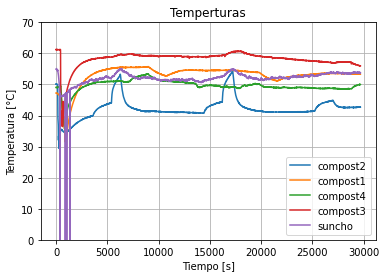

In [9]:
plt.figure("Temperaturas")
plt.title("Temperturas")
plt.plot(tiempos, temp_suncho, '-', markersize=1, label='compost2')
plt.plot(tiempos, temp_compost_1, '-', markersize=1, label='compost1')
plt.plot(tiempos, temp_compost_2, '-', markersize=1, label='compost4')
plt.plot(tiempos, temp_compost_3, '-', markersize=1, label='compost3')
plt.plot(tiempos, temp_compost_4, '-', markersize=1, label='suncho')
plt.legend()
plt.grid()
plt.ylim(0,70)
plt.xlabel("Tiempo [s]")
plt.ylabel("Temperatura [°C]")
plt.savefig(f"{PATH}/{DATE}/figuras/Temperatura.png")
plt.show()

No handles with labels found to put in legend.


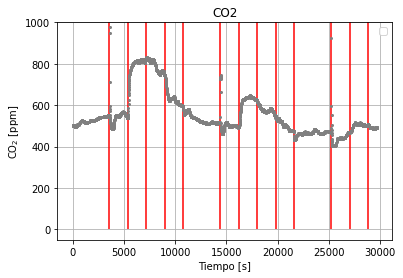

In [10]:
plt.figure("CO2")
plt.title("CO2")
plt.plot(tiempos, co2, ".", color="grey", markersize=4)
#plt.plot(tiempos, co2, "o", color="blue", label="TPS")
#plt.plot(tiempos, co2, "o", color="orange", label="Celulosa")
#plt.plot(tiempos, co2, "o", color="green", label=r"TPS/NP-$\mathrm{TiO_2}$")
#plt.plot(tiempos, co2, "o", color="red", label="Blanco")
for i in range(len(danza)):
    plt.vlines(x=danza[i], ymin=0, ymax=5000, color="red")
plt.grid()
plt.legend()
plt.xlabel("Tiempo [s]")
plt.ylabel(r"$\mathrm{CO_2}$ [ppm]")

plt.ylim(-50,1000)
#plt.xlim(0,75000)

plt.savefig(f"{PATH}/{DATE}/figuras/CO2_completo.png")
plt.show()

# Integración

In [11]:
inicio = [] # Posición para empezar a medir el área
fin = []
for i in range(len(pos) - 1):
    if pos[i + 1] - pos[i] < 500:
        inicio.append(pos[i] + 60) # Dejamos 60 posiciones (5 minutos aprox) de espera
#        inicio.append(pos[i])
        fin.append(pos[i + 1])

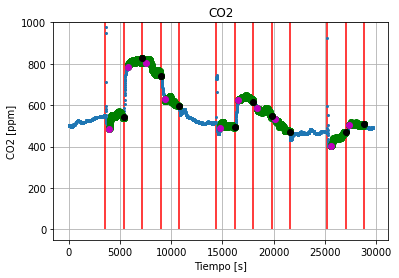

In [12]:
plt.figure("CO2")
plt.title("CO2")
plt.plot(tiempos, co2, ".", markersize=4)
for i in range(len(danza)):
    plt.vlines(x=danza[i], ymin=0, ymax=3000, color="r")
plt.grid()
plt.xlabel("Tiempo [s]")
plt.ylabel("CO2 [ppm]")

#plt.xlim(175000,200000)
plt.ylim(-50,1000)

plt.scatter(tiempos[inicio], co2[inicio], color="m", zorder=4) #marco el inicio de cada área en color magenta
plt.scatter(tiempos[fin], co2[fin], color="k", zorder=5) #marco el fin de cada área en color negro
for i in range(len(inicio)):
    plt.scatter(tiempos[inicio[i]:fin[i]], co2[inicio[i]:fin[i]], color="g", zorder=3)

plt.savefig(f"{PATH}/{DATE}/figuras/areas_pintadas.png")
plt.show()

In [13]:
#CALCULO UN VALOR PROMEDIO, Y SU ERROR
promedio=[]
promedio_std=[]
for i in range(len(inicio)):
    promedio.append(np.mean(co2[inicio[i]:fin[i]].astype(float)))
    promedio_std.append(np.std(co2[inicio[i]:fin[i]].astype(float)))

In [15]:
promedio1 = []
promedio2 = []
promedio3 = []
promedio4 = []

promedio_std1 = []
promedio_std2 = []
promedio_std3 = []
promedio_std4 = []

for i in range(int(len(promedio) / 4)):
    promedio1.append(promedio[4 * i])
    promedio2.append(promedio[4 * i + 1])
    promedio3.append(promedio[4 * i + 2])
    promedio4.append(promedio[4 * i + 3])
    
    promedio_std1.append(promedio_std[4 * i])
    promedio_std2.append(promedio_std[4 * i + 1])
    promedio_std3.append(promedio_std[4 * i + 2])
    promedio_std4.append(promedio_std[4 * i + 3])

a=np.transpose(np.array([np.arange(1,(int(len(promedio1)))+1,1),promedio1,promedio2,promedio3,promedio4]))
np.savetxt(f'{PATH}/{DATE}/figuras/promedio.csv', a, delimiter=', ', newline='\n', header='nro,promedio1,promedio2,promedio3,promedio4')

b=np.transpose(np.array([np.arange(1,(int(len(promedio_std1)))+1,1),promedio_std1,promedio_std2,promedio_std3,promedio_std4]))
np.savetxt(f'{PATH}/{DATE}/figuras/promedio_std.csv', b, delimiter=', ', newline='\n', header='nro,promedio_std1,promedio_std2,promedio_std3,promedio_std4')


In [16]:
promedio

[548.4048582995952,
 811.0607287449393,
 779.6072874493927,
 617.9028340080972,
 502.46963562753035,
 634.1781376518219,
 571.3117408906883,
 495.9311740890688,
 442.4736842105263,
 507.85425101214577]

La fórmula es 
g= $\frac{F CT 44 g/mol}{22414 . 10^6 0.001L/mol}$

Con F el flujo (1.5L/min), CT el área bajo la curva en MINUTOS, como lo tenemos en segundos:

g= $\frac{F* CT/60 * 44 g/mol}{22414 . 10^6 0.001L/mol}$

In [ ]:
F = 1.5
den = 22414 * 0.001 * 10 ** 6

def gramos(x): # Meter el área
    return F * x * 44 / (den * 60)

In [ ]:
gramos(np.array(promedio))

In [ ]:
from datetime import datetime  
from datetime import timedelta  
  
#Add 1 day  
print(datetime.now() + timedelta(days=1))
  
#Subtract 60 seconds  
print (datetime.now() - timedelta(seconds=60)) 
  
#Add 2 years  
print (datetime.now() + timedelta(days=730) ) 
  
#Other Parameters you can pass in to timedelta:  
# days, seconds, microseconds,   
# milliseconds, minutes, hours, weeks  
  
#Pass multiple parameters (1 day and 5 minutes)  
print (datetime.now() + timedelta(days=1,minutes=5)  )

In [ ]:
DATE

In [ ]:
from datetime import date
date.fromisoformat(f'{DATE[0:10]}')

In [ ]:
datetime.time(f'{DATE[11:]}')

In [ ]:
DATE[11:].replace('"','\\' )

In [ ]:
replace(DATE[0:10],'"','\\"')